In [1]:
# https://github.com/awslabs/amazon-sagemaker-examples/blob/master/advanced_functionality/working_with_redshift_data/working_with_redshift_data.ipynb

In [2]:
import os
import boto3
import pandas as pd
import json
import psycopg2
import sqlalchemy as sa
import json

In [3]:
credfile = 'redshift_creds_template.json.nogit'

# Read credentials to a dictionary
with open(credfile) as fh:
    creds = json.loads(fh.read())

def get_conn(creds): 
    conn = psycopg2.connect(dbname=creds['db_name'], 
                            user=creds['username'], 
                            password=creds['password'],
                            port=creds['port_num'],
                            host=creds['host_name'])
    return conn

def get_df(creds, query):
    with get_conn(creds) as conn:
        with conn.cursor() as cur:
            cur.execute(query)
            result_set = cur.fetchall()
            colnames = [desc.name for desc in cur.description]
            df = pd.DataFrame.from_records(result_set, columns=colnames)
    return df

In [6]:
sql = "select table_name from information_schema.tables where table_name like 'awsbilling%'"
table_df = get_df(creds, sql)
table_df

,table_name
0,awsbilling201608
1,awsbilling201609_tagmapping
2,awsbilling201608_tagmapping
3,awsbilling201609
4,awsbilling201610
5,awsbilling201610_tagmapping
6,awsbilling201611
7,awsbilling201611_tagmapping
8,awsbilling201612
9,awsbilling201612_tagmapping


In [7]:
import os
import boto3
region = os.getenv('AWS_DEFAULT_REGION')
s3 = boto3.client('s3', region_name=region)

s3_bucket = 'sungardas-aws-services-billing-graphimagebucket-lv7d7riqedp7'
prefix = 'dataframes/'

In [8]:
# import all dataframes from s3 bucket

import pickle

all_df = pd.DataFrame()

response = s3.list_objects(Bucket=s3_bucket, Prefix=prefix)
for obj in response['Contents']:
    month_response = s3.get_object(Bucket=s3_bucket, Key=obj['Key'])
    month_df = pickle.loads(month_response['Body'].read())
    print("{} dataframe has been imported".format(obj['Key']))
    #print(month_df.head())
    all_df = pd.concat([all_df, month_df], ignore_index=True)

print("all dataframes have been imported")
all_df

dataframes/201608_by_day.pkl dataframe has been imported
dataframes/201609_by_day.pkl dataframe has been imported
dataframes/201610_by_day.pkl dataframe has been imported
dataframes/201611_by_day.pkl dataframe has been imported
dataframes/201612_by_day.pkl dataframe has been imported
dataframes/201701_by_day.pkl dataframe has been imported
dataframes/201702_by_day.pkl dataframe has been imported
dataframes/201703_by_day.pkl dataframe has been imported
dataframes/201704_by_day.pkl dataframe has been imported
dataframes/201705_by_day.pkl dataframe has been imported
dataframes/201706_by_day.pkl dataframe has been imported
dataframes/201707_by_day.pkl dataframe has been imported
dataframes/201708_by_day.pkl dataframe has been imported
dataframes/201709_by_day.pkl dataframe has been imported
dataframes/201710_by_day.pkl dataframe has been imported
dataframes/201711_by_day.pkl dataframe has been imported
dataframes/201712_by_day.pkl dataframe has been imported
dataframes/201801_by_day.pkl da

,enddatetime,lineitem_usageaccountid,lineitem_productcode,usage_amount,blended,unblended
0,2016-08-01,041802784822,AWSCloudTrail,1086,0.00,0.00
1,2016-08-01,041802784822,AWSConfig,49,0.15,0.15
2,2016-08-01,041802784822,AWSQueueService,2597,0.00,0.00
3,2016-08-01,041802784822,AmazonDynamoDB,10,0.00,0.00
4,2016-08-01,041802784822,AmazonEC2,75327,1.20,1.20
5,2016-08-01,041802784822,AmazonS3,331,0.00,0.00
6,2016-08-01,041802784822,AmazonSNS,59,0.00,0.00
7,2016-08-01,050132637519,AWSCloudTrail,451092,0.00,0.00
8,2016-08-01,050132637519,AWSConfig,32,0.10,0.10
9,2016-08-01,050132637519,AWSLambda,1425,0.00,0.00


In [9]:
# find the current month data

import datetime
from dateutil.relativedelta import relativedelta
from dateutil import parser

#account_id = '054649790173'
#account_id = '876224653878'
current_date = datetime.datetime.today()
#next_date = current_date + relativedelta(days=1)
#current_date = datetime.datetime.today() + relativedelta(months=-1)
#next_date = current_date + relativedelta(months=1) + relativedelta(days=-1)

sql = "select substring(cast(lineitem_usageenddate as datetime) from 1 for 10) enddatetime, lineItem_UsageAccountId, lineitem_productcode,"
#sql += " product_servicecode, lineitem_operation, lineitem_usagetype,"
sql += " sum(lineItem_UsageAmount) usage_amount,"
sql += " to_char(sum(cast(lineItem_BlendedCost as float)), 'FM999,999,999,990D00') blended,"
sql += " to_char(sum(cast(lineitem_unblendedcost as float)), 'FM999,999,999,990D00') unblended"
sql += " from AWSBilling%s" % (current_date.strftime('%Y%m'))
sql += " where lineitem_lineitemtype != 'Tax'"
#sql += " and lineitem_usageaccountid = '%s'" %(account_id)
sql += " and lineitem_usageenddate >= '%s'" % (current_date.strftime('%Y-%m-01'))
sql += " and lineitem_usageenddate < '%s'" % (current_date.strftime('%Y-%m-%d'))
sql += " group by enddatetime, lineItem_UsageAccountId, lineitem_productcode"
#sql += ", product_servicecode, lineitem_operation, lineitem_usagetype"
sql += " order by enddatetime, lineItem_UsageAccountId, lineitem_productcode"
print(sql)
current_df = get_df(creds, sql)
current_df

select substring(cast(lineitem_usageenddate as datetime) from 1 for 10) enddatetime, lineItem_UsageAccountId, lineitem_productcode, sum(lineItem_UsageAmount) usage_amount, to_char(sum(cast(lineItem_BlendedCost as float)), 'FM999,999,999,990D00') blended, to_char(sum(cast(lineitem_unblendedcost as float)), 'FM999,999,999,990D00') unblended from AWSBilling201802 where lineitem_lineitemtype != 'Tax' and lineitem_usageenddate >= '2018-02-01' and lineitem_usageenddate < '2018-02-14' group by enddatetime, lineItem_UsageAccountId, lineitem_productcode order by enddatetime, lineItem_UsageAccountId, lineitem_productcode


,enddatetime,lineitem_usageaccountid,lineitem_productcode,usage_amount,blended,unblended
0,2018-02-01,014458831776,AWSCloudTrail,6737,0.00,0.00
1,2018-02-01,014458831776,AmazonS3,5429,0.01,0.01
2,2018-02-01,015468674240,AWSCloudTrail,6406,0.00,0.00
3,2018-02-01,015468674240,AmazonEC2,23,0.11,0.11
4,2018-02-01,015468674240,AmazonS3,5130,0.01,0.01
5,2018-02-01,018259383398,AWSCloudTrail,6129,0.00,0.00
6,2018-02-01,018259383398,AmazonS3,4951,0.01,0.01
7,2018-02-01,023013128792,AWSCloudTrail,6494,0.00,0.00
8,2018-02-01,023013128792,AmazonS3,5107,0.01,0.01
9,2018-02-01,027391513213,AWSCloudTrail,3789,0.00,0.00


In [10]:
# merge the current data into all
all_df = pd.concat([all_df, current_df], ignore_index=True)
all_df

,enddatetime,lineitem_usageaccountid,lineitem_productcode,usage_amount,blended,unblended
0,2016-08-01,041802784822,AWSCloudTrail,1086,0.00,0.00
1,2016-08-01,041802784822,AWSConfig,49,0.15,0.15
2,2016-08-01,041802784822,AWSQueueService,2597,0.00,0.00
3,2016-08-01,041802784822,AmazonDynamoDB,10,0.00,0.00
4,2016-08-01,041802784822,AmazonEC2,75327,1.20,1.20
5,2016-08-01,041802784822,AmazonS3,331,0.00,0.00
6,2016-08-01,041802784822,AmazonSNS,59,0.00,0.00
7,2016-08-01,050132637519,AWSCloudTrail,451092,0.00,0.00
8,2016-08-01,050132637519,AWSConfig,32,0.10,0.10
9,2016-08-01,050132637519,AWSLambda,1425,0.00,0.00


In [28]:
valid_df = all_df[(all_df['blended'] >= '1.00') | (all_df['unblended'] >= '1.00')]
valid_df

,enddatetime,lineitem_usageaccountid,lineitem_productcode,usage_amount,blended,unblended
4,2016-08-01,041802784822,AmazonEC2,75327,1.20,1.20
12,2016-08-01,050132637519,AmazonEC2,81121,33.58,33.57
14,2016-08-01,050132637519,AmazonES,23,2.16,2.16
15,2016-08-01,050132637519,AmazonRDS,3122653,53.99,53.99
23,2016-08-01,054649790173,AmazonEC2,7118222,8.26,8.24
26,2016-08-01,054649790173,AmazonRoute53,29328,2.08,3.01
30,2016-08-01,054649790173,AmazonVPC,23,1.15,1.15
35,2016-08-01,059504812767,AmazonEC2,56127,42.33,42.32
36,2016-08-01,059504812767,AmazonRDS,23,19.25,19.25
40,2016-08-01,059504812767,AmazonVPC,23,1.15,1.15


In [29]:
services = valid_df.lineitem_productcode.unique()
print(services)
print(len(services))

['AmazonEC2' 'AmazonES' 'AmazonRDS' 'AmazonRoute53' 'AmazonVPC' 'AWSConfig'
 'AmazonDynamoDB' 'AmazonElastiCache' 'AmazonRedshift' 'awskms'
 'AWSCloudTrail' 'AmazonKinesis' 'AmazonWorkSpaces' 'AWSDirectoryService'
 'AmazonCloudWatch' 'AmazonS3' 'ElasticMapReduce' 'AWSSupportBusiness'
 'AWSLambda' 'AWSCodePipeline' 'eatuvsbbicw1b4cx89ppozcjt'
 '80uds1joqwlz35hw1lx5h1bcc' '9fmjj3b9hombuy4jawab1i13i' 'CodeBuild'
 'AmazonQuickSight' 'amhsn56aixnfdj0w9dr7l0d3z' 'AWSDirectConnect' 'AWSIoT'
 '3cp2dpaqhzkcvbypacjgec8s5' 'b4oaowtu943z36a9jxepql6gh' 'AmazonApiGateway'
 'AWSQueueService' 'AmazonDAX' 'AWSGlue' 'comprehend' 'AWSCodeCommit'
 'AWSServiceCatalog' 'AmazonECS']
38


In [30]:
accounts = valid_df.lineitem_usageaccountid.unique()
len(accounts)

117

In [31]:
target_df = valid_df[(valid_df['lineitem_productcode'] == 'AmazonEC2')
                      & (valid_df['lineitem_usageaccountid'] == '876224653878')
                      & (valid_df['enddatetime'] >= '2018-02-01')
                      & (valid_df['enddatetime'] < '2018-03-01')
                     ]
target_df

,enddatetime,lineitem_usageaccountid,lineitem_productcode,usage_amount,blended,unblended
231925,2018-02-01,876224653878,AmazonEC2,300,17.58,17.58
232477,2018-02-02,876224653878,AmazonEC2,313,18.34,18.34
233011,2018-02-03,876224653878,AmazonEC2,313,18.34,18.34
233526,2018-02-04,876224653878,AmazonEC2,313,18.34,18.34
234051,2018-02-05,876224653878,AmazonEC2,313,18.34,18.34
234580,2018-02-06,876224653878,AmazonEC2,313,18.34,18.34
235156,2018-02-07,876224653878,AmazonEC2,341,19.23,19.23
235705,2018-02-08,876224653878,AmazonEC2,481,23.68,23.68
236270,2018-02-09,876224653878,AmazonEC2,486,23.74,23.74
236803,2018-02-10,876224653878,AmazonEC2,505,23.99,23.99


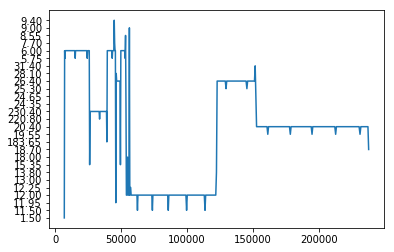

In [32]:
import matplotlib.pyplot as plt

service = 'AmazonRedshift'
account = '054649790173'

svc_df = valid_df[(valid_df['lineitem_productcode'] == service) & (valid_df['lineitem_usageaccountid'] == account)]
#print(svc_df['unblended'].head())
plt.plot(svc_df['unblended'])
plt.show()

In [24]:
import matplotlib
matplotlib.__version__

'2.1.1'

In [ ]:
#################################################################################################################
# https://machinelearningmastery.com/time-series-prediction-lstm-recurrent-neural-networks-python-keras/
# this block is not finished becuase this sample is old, July 21, 2016 

In [26]:
import numpy
import matplotlib.pyplot as plt
import pandas
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [27]:
# fix random seed for reproducibility
numpy.random.seed(7)

In [46]:
# load the dataset
dataset = svc_df['unblended'].values
dataset = dataset.astype('float32')
dataset = dataset.reshape(-1, 1)   # convert the dataset as 2D
dataset

array([[   1.5       ],
       [   6.        ],
       [   5.75      ],
       [   6.        ],
       [   6.        ],
       [   6.        ],
       [   6.        ],
       [   6.        ],
       [   6.        ],
       [   6.        ],
       [   6.        ],
       [   6.        ],
       [   6.        ],
       [   6.        ],
       [   6.        ],
       [   6.        ],
       [   6.        ],
       [   6.        ],
       [   6.        ],
       [   6.        ],
       [   6.        ],
       [   6.        ],
       [   6.        ],
       [   6.        ],
       [   6.        ],
       [   6.        ],
       [   6.        ],
       [   6.        ],
       [   6.        ],
       [   6.        ],
       [   6.        ],
       [   6.        ],
       [   5.75      ],
       [   6.        ],
       [   6.        ],
       [   6.        ],
       [   6.        ],
       [   6.        ],
       [   6.        ],
       [   6.        ],
       [   6.        ],
       [   6.   

In [47]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
dataset

array([[ 0.        ],
       [ 0.01965924],
       [ 0.01856706],
       [ 0.01965924],
       [ 0.01965924],
       [ 0.01965924],
       [ 0.01965924],
       [ 0.01965924],
       [ 0.01965924],
       [ 0.01965924],
       [ 0.01965924],
       [ 0.01965924],
       [ 0.01965924],
       [ 0.01965924],
       [ 0.01965924],
       [ 0.01965924],
       [ 0.01965924],
       [ 0.01965924],
       [ 0.01965924],
       [ 0.01965924],
       [ 0.01965924],
       [ 0.01965924],
       [ 0.01965924],
       [ 0.01965924],
       [ 0.01965924],
       [ 0.01965924],
       [ 0.01965924],
       [ 0.01965924],
       [ 0.01965924],
       [ 0.01965924],
       [ 0.01965924],
       [ 0.01965924],
       [ 0.01856706],
       [ 0.01965924],
       [ 0.01965924],
       [ 0.01965924],
       [ 0.01965924],
       [ 0.01965924],
       [ 0.01965924],
       [ 0.01965924],
       [ 0.01965924],
       [ 0.01965924],
       [ 0.01965924],
       [ 0.01965924],
       [ 0.01965924],
       [ 0

In [48]:
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

357 176


In [54]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return numpy.array(dataX), numpy.array(dataY)

In [55]:
dataset[0:2, 0]

array([ 0.        ,  0.01965924], dtype=float32)

In [56]:
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [58]:
trainY

array([ 0.01965924,  0.01856706,  0.01965924,  0.01965924,  0.01965924,
        0.01965924,  0.01965924,  0.01965924,  0.01965924,  0.01965924,
        0.01965924,  0.01965924,  0.01965924,  0.01965924,  0.01965924,
        0.01965924,  0.01965924,  0.01965924,  0.01965924,  0.01965924,
        0.01965924,  0.01965924,  0.01965924,  0.01965924,  0.01965924,
        0.01965924,  0.01965924,  0.01965924,  0.01965924,  0.01965924,
        0.01965924,  0.01856706,  0.01965924,  0.01965924,  0.01965924,
        0.01965924,  0.01965924,  0.01965924,  0.01965924,  0.01965924,
        0.01965924,  0.01965924,  0.01965924,  0.01965924,  0.01965924,
        0.01965924,  0.01965924,  0.01965924,  0.01965924,  0.01965924,
        0.01965924,  0.01965924,  0.01965924,  0.01965924,  0.01965924,
        0.01965924,  0.01965924,  0.01965924,  0.01965924,  0.01965924,
        0.01965924,  0.01965924,  0.01856706,  0.01965924,  0.01965924,
        0.01965924,  0.01965924,  0.01965924,  0.06050677,  1.  

In [ ]:
#....
#....
############################################################################################################

In [ ]:
#################################################################################################################
# https://machinelearningmastery.com/time-series-forecasting-long-short-term-memory-network-python/

In [71]:
from pandas import read_csv
from pandas import datetime
from pandas import DataFrame
from pandas import concat

# frame a sequence as a supervised learning problem
def timeseries_to_supervised(data, lag=1):
    df = DataFrame(data)
    columns = [df.shift(i) for i in range(1, lag+1)]
    columns.append(df)
    df = concat(columns, axis=1)
    df.fillna(0, inplace=True)
    return df

In [82]:
#from pandas import read_csv
#from pandas import datetime
from pandas import Series
from sklearn.preprocessing import MinMaxScaler

In [85]:
###############################################
# 1. normalize data
# 2. transform normalized data to be supervised learning
# 3. split normalized data into train and test sets
###############################################

series = svc_df['unblended']
print("series:")
print(series.head())
print(len(series))

# transform scale
X = series.values
X = X.reshape(len(X), 1)
scaler = MinMaxScaler(feature_range=(-1, 1))
scaler = scaler.fit(X)
scaled_X = scaler.transform(X)
scaled_series = Series(scaled_X[:, 0])
print("\nscaled_series:")
print(scaled_series.head())

# invert transform
inverted_X = scaler.inverse_transform(scaled_X)
inverted_series = Series(inverted_X[:, 0])
print("\ninverted_series:")
print(inverted_series.head())

# transform normalized data to supervised learning
X = scaled_series.values
supervised = timeseries_to_supervised(X, 1)
print("\nsupervised:")
print(supervised)

# split data into train and test-sets
supervised_values = supervised.values
train_size = int(len(supervised_values) * 0.67)
test_size = len(supervised_values) - train_size
train, test = supervised_values[0:train_size,:], supervised_values[train_size:len(dataset),:]
print("\ntrain:")
print(train)
print("\ntest:")
print(test)
print(len(train), len(test))

series:
7003    1.50
7255    6.00
7530    5.75
7785    6.00
8034    6.00
Name: unblended, dtype: object
533

scaled_series
0   -1.000000
1   -0.960682
2   -0.962866
3   -0.960682
4   -0.960682
dtype: float64

inverted_series
0    1.50
1    6.00
2    5.75
3    6.00
4    6.00
dtype: float64

supervised
            0         0
0    0.000000 -1.000000
1   -1.000000 -0.960682
2   -0.960682 -0.962866
3   -0.962866 -0.960682
4   -0.960682 -0.960682
5   -0.960682 -0.960682
6   -0.960682 -0.960682
7   -0.960682 -0.960682
8   -0.960682 -0.960682
9   -0.960682 -0.960682
10  -0.960682 -0.960682
11  -0.960682 -0.960682
12  -0.960682 -0.960682
13  -0.960682 -0.960682
14  -0.960682 -0.960682
15  -0.960682 -0.960682
16  -0.960682 -0.960682
17  -0.960682 -0.960682
18  -0.960682 -0.960682
19  -0.960682 -0.960682
20  -0.960682 -0.960682
21  -0.960682 -0.960682
22  -0.960682 -0.960682
23  -0.960682 -0.960682
24  -0.960682 -0.960682
25  -0.960682 -0.960682
26  -0.960682 -0.960682
27  -0.960682 -0.960682
28

/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [86]:
###############################################
# 1. transform data to be supervised learning
# 2. split data into train and test sets
# 3. normalize both sets
###############################################

# scale train and test data to [-1, 1]
def scale(train, test):
    # fit scaler
    scaler = MinMaxScaler(feature_range=(-1, 1))
    scaler = scaler.fit(train)
    # transform train
    train = train.reshape(train.shape[0], train.shape[1])
    train_scaled = scaler.transform(train)
    # transform test
    test = test.reshape(test.shape[0], test.shape[1])
    test_scaled = scaler.transform(test)
    return scaler, train_scaled, test_scaled
 
# inverse scaling for a forecasted value
def invert_scale(scaler, X, value):
    new_row = [x for x in X] + [value]
    array = numpy.array(new_row)
    array = array.reshape(1, len(array))
    inverted = scaler.inverse_transform(array)
    return inverted[0, -1]


# transform data to be supervised learning
supervised = timeseries_to_supervised(series, 1)
supervised_values = supervised.values
print("supervised_values:")
print(supervised_values)

# split data into train and test-sets
supervised_values = supervised.values
train_size = int(len(supervised_values) * 0.67)
test_size = len(supervised_values) - train_size
train, test = supervised_values[0:train_size,:], supervised_values[train_size:len(dataset),:]
print("\ntrain:")
print(train)
print("\ntest:")
print(test)
print(len(train), len(test))

# transform the scale of the data
scaler, train_scaled, test_scaled = scale(train, test)
print("\train_scaled:")
print(train_scaled)
print("\test_scaled:")
print(test_scaled)

supervised_values:
[[0 '1.50']
 ['1.50' '6.00']
 ['6.00' '5.75']
 ..., 
 ['20.40' '20.40']
 ['20.40' '20.40']
 ['20.40' '18.70']]

train:
[[0 '1.50']
 ['1.50' '6.00']
 ['6.00' '5.75']
 ['5.75' '6.00']
 ['6.00' '6.00']
 ['6.00' '6.00']
 ['6.00' '6.00']
 ['6.00' '6.00']
 ['6.00' '6.00']
 ['6.00' '6.00']
 ['6.00' '6.00']
 ['6.00' '6.00']
 ['6.00' '6.00']
 ['6.00' '6.00']
 ['6.00' '6.00']
 ['6.00' '6.00']
 ['6.00' '6.00']
 ['6.00' '6.00']
 ['6.00' '6.00']
 ['6.00' '6.00']
 ['6.00' '6.00']
 ['6.00' '6.00']
 ['6.00' '6.00']
 ['6.00' '6.00']
 ['6.00' '6.00']
 ['6.00' '6.00']
 ['6.00' '6.00']
 ['6.00' '6.00']
 ['6.00' '6.00']
 ['6.00' '6.00']
 ['6.00' '6.00']
 ['6.00' '6.00']
 ['6.00' '5.75']
 ['5.75' '6.00']
 ['6.00' '6.00']
 ['6.00' '6.00']
 ['6.00' '6.00']
 ['6.00' '6.00']
 ['6.00' '6.00']
 ['6.00' '6.00']
 ['6.00' '6.00']
 ['6.00' '6.00']
 ['6.00' '6.00']
 ['6.00' '6.00']
 ['6.00' '6.00']
 ['6.00' '6.00']
 ['6.00' '6.00']
 ['6.00' '6.00']
 ['6.00' '6.00']
 ['6.00' '6.00']
 ['6.00' '6.00']


/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [ ]:
# fit an LSTM network to training data
def fit_lstm(train, batch_size, nb_epoch, neurons):
    X, y = train[:, 0:-1], train[:, -1]
    
    # Given that the training dataset is defined as X inputs and y outputs,
    # it must be reshaped into the Samples/TimeSteps/Features format
    X = X.reshape(X.shape[0], 1, X.shape[1])
    
    model = Sequential()
    model.add(LSTM(neurons, batch_input_shape=(batch_size, X.shape[1], X.shape[2]), stateful=True))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    for i in range(nb_epoch):
        if i % 100 == 0:
            print("epoch %d" % i)
        model.fit(X, y, epochs=1, batch_size=batch_size, verbose=0, shuffle=False)
        model.reset_states()
    return model

# fit the model
lstm_model = fit_lstm(train_scaled, 1, 3000, 4)

epoch 0
epoch 100
epoch 200
epoch 300
epoch 400
epoch 500
epoch 600
epoch 700
epoch 800
epoch 900
epoch 1000


In [ ]:
#################################################################################################################

In [23]:
# https://machinelearningmastery.com/multi-step-time-series-forecasting-long-short-term-memory-networks-python/
# now start LSTM model training with multi-step

from pandas import DataFrame
from pandas import Series
from pandas import concat
from pandas import read_csv
from pandas import datetime
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from math import sqrt
from matplotlib import pyplot
from numpy import array

Using TensorFlow backend.
/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [ ]:
# convert time series into supervised learning problem
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

# transform series into train and test sets for supervised learning
def prepare_data(series, n_test, n_lag, n_seq):
    # extract raw values
    raw_values = series.values
    # transform data to be stationary
    diff_series = difference(raw_values, 1)
    diff_values = diff_series.values
    diff_values = diff_values.reshape(len(diff_values), 1)
    # rescale values to -1, 1
    scaler = MinMaxScaler(feature_range=(-1, 1))
    scaled_values = scaler.fit_transform(diff_values)
    scaled_values = scaled_values.reshape(len(scaled_values), 1)
    # transform into supervised learning problem X, y
    supervised = series_to_supervised(scaled_values, n_lag, n_seq)
    supervised_values = supervised.values
    # split into train and test sets
    train, test = supervised_values[0:-n_test], supervised_values[-n_test:]
    return scaler, train, test

# fit an LSTM network to training data
def fit_lstm(train, n_lag, n_seq, n_batch, nb_epoch, n_neurons):
	# reshape training into [samples, timesteps, features]
	X, y = train[:, 0:n_lag], train[:, n_lag:]
	X = X.reshape(X.shape[0], 1, X.shape[1])
	# design network
	model = Sequential()
	model.add(LSTM(n_neurons, batch_input_shape=(n_batch, X.shape[1], X.shape[2]), stateful=True))
	model.add(Dense(y.shape[1]))
	model.compile(loss='mean_squared_error', optimizer='adam')
	# fit network
	for i in range(nb_epoch):
		model.fit(X, y, epochs=1, batch_size=n_batch, verbose=0, shuffle=False)
		model.reset_states()
	return model

# make one forecast with an LSTM,
def forecast_lstm(model, X, n_batch):
	# reshape input pattern to [samples, timesteps, features]
	X = X.reshape(1, 1, len(X))
	# make forecast
	forecast = model.predict(X, batch_size=n_batch)
	# convert to array
	return [x for x in forecast[0, :]]

# evaluate the persistence model
def make_forecasts(model, n_batch, train, test, n_lag, n_seq):
	forecasts = list()
	for i in range(len(test)):
		X, y = test[i, 0:n_lag], test[i, n_lag:]
		# make forecast
		forecast = forecast_lstm(model, X, n_batch)
		# store the forecast
		forecasts.append(forecast)
	return forecasts

# invert differenced forecast
def inverse_difference(last_ob, forecast):
	# invert first forecast
	inverted = list()
	inverted.append(forecast[0] + last_ob)
	# propagate difference forecast using inverted first value
	for i in range(1, len(forecast)):
		inverted.append(forecast[i] + inverted[i-1])
	return inverted

# inverse data transform on forecasts
def inverse_transform(series, forecasts, scaler, n_test):
	inverted = list()
	for i in range(len(forecasts)):
		# create array from forecast
		forecast = array(forecasts[i])
		forecast = forecast.reshape(1, len(forecast))
		# invert scaling
		inv_scale = scaler.inverse_transform(forecast)
		inv_scale = inv_scale[0, :]
		# invert differencing
		index = len(series) - n_test + i - 1
		last_ob = series.values[index]
		inv_diff = inverse_difference(last_ob, inv_scale)
		# store
		inverted.append(inv_diff)
	return inverted

# evaluate the RMSE for each forecast time step
def evaluate_forecasts(test, forecasts, n_lag, n_seq):
	for i in range(n_seq):
		actual = [row[i] for row in test]
		predicted = [forecast[i] for forecast in forecasts]
		rmse = sqrt(mean_squared_error(actual, predicted))
		print('t+%d RMSE: %f' % ((i+1), rmse))

# plot the forecasts in the context of the original dataset
def plot_forecasts(series, forecasts, n_test):
	# plot the entire dataset in blue
	pyplot.plot(series.values)
	# plot the forecasts in red
	for i in range(len(forecasts)):
		off_s = len(series) - n_test + i - 1
		off_e = off_s + len(forecasts[i]) + 1
		xaxis = [x for x in range(off_s, off_e)]
		yaxis = [series.values[off_s]] + forecasts[i]
		pyplot.plot(xaxis, yaxis, color='red')
	# show the plot
	pyplot.show()
